# 공간통계(Spatial Statistics) 실습

※ Windows 환경에서 패키지 오류가 일어나는 경우(shapely, fiona 등), 아래 링크를 참조하시면 됩니다.       

* 관련링크

링크 1 : https://towardsdatascience.com/install-shapely-on-windows-72b6581bb46c

링크 2 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely


# 0. Import packages

In [1]:
!pip install geopandas

In [2]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium

import geopandas as gpd

In [3]:
os.chdir("./drive/My Drive/data/spatial/")

# 1. Point-referenced data

실습에 사용된 예제는 서울 열린데이터광장의 [서울시 공공와이파이 위치정보](http://data.seoul.go.kr/dataList/OA-1218/S/1/datasetView.do;jsessionid=1024575F5105EFBB20B362FF4C6925E7.new_portal-svr-11) 데이터 입니다.

**※ 데이터 기입 오류 등의 문제가 위경도에 존재하여 이를 미리 처리한 데이터를 이용하였습니다.**

In [4]:
wifi = pd.read_csv("서울시 공공와이파이 위치정보.csv",encoding='cp949')
wifi

,구명,유형,설치주소,지역명,상세설치장소,설치기관(회사),설치위치(X좌표),설치위치(Y좌표),콘텐츠아이디
0,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 1F,서울시(시스코),127.088505,37.479804,WF120001
1,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 1F,서울시(시스코),127.088505,37.479804,WF120002
2,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 1F,서울시(시스코),127.088505,37.479804,WF120003
3,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 1F,서울시(시스코),127.088505,37.479804,WF120004
4,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 2F,서울시(시스코),127.088505,37.479804,WF120005
...,...,...,...,...,...,...,...,...,...
13833,중랑구,전통시장,전통시장,동일로139다길 40,NaN,자치구,127.076361,37.605022,WN001715
13834,중랑구,공원,용마폭포공원,용마산로 250-12,용마폭포공원,자치구,127.090378,37.573137,WN001716
13835,중랑구,공원,용마폭포공원,용마산로 250-12,용마폭포공원,자치구,127.091151,37.572857,WN001717
13836,중랑구,공공기관,중랑구청,봉화산로 179,구청 3층 건설관리과,자치구,127.092799,37.606524,WN001718


In [5]:
wifi = wifi.drop(['지역명','상세설치장소','콘텐츠아이디'], axis=1)

In [6]:
wifi.columns = ["gu","type","zone","comp","lon","lat"]
wifi.head()

,gu,type,zone,comp,lon,lat
0,강남구,복지센터등,아동복지센터,서울시(시스코),127.088505,37.479804
1,강남구,복지센터등,아동복지센터,서울시(시스코),127.088505,37.479804
2,강남구,복지센터등,아동복지센터,서울시(시스코),127.088505,37.479804
3,강남구,복지센터등,아동복지센터,서울시(시스코),127.088505,37.479804
4,강남구,복지센터등,아동복지센터,서울시(시스코),127.088505,37.479804


In [7]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13838 entries, 0 to 13837
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gu      13838 non-null  object 
 1   type    13838 non-null  object 
 2   zone    13838 non-null  object 
 3   comp    13838 non-null  object 
 4   lon     13821 non-null  float64
 5   lat     13821 non-null  float64
dtypes: float64(2), object(4)
memory usage: 648.8+ KB


In [8]:
wifi.shape

(13838, 6)

In [9]:
wifi.isnull().sum()

gu       0
type     0
zone     0
comp     0
lon     17
lat     17
dtype: int64

: 편의상 결측값을 제거하여 사용합니다.

In [10]:
wifi1 = wifi.dropna()
wifi1.shape

(13821, 6)

## Base

In [11]:
map = folium.Map(location = [37.564346,126.982062],zoom_start=11,
                 tiles='cartodbpositron'
                )
map

이외 다른 tile 옵션은 다음과 같습니다.

    'tiles' options
    - Open street map (default) 
    - Map Quest Open 
    - MapQuest Open Aerial 
    - Mapbox Bright 
    - Mapbox Control Room 
    - Stamenterrain 
    - Stamentoner 
    - Stamenwatercolor 
    - cartodbpositron 
    - cartodbdark_matter


출처: https://dailyheumsi.tistory.com/144?category=854906 [하나씩 점을 찍어 나가며]

## CircleMarker

In [12]:
wifi1.shape

(13821, 6)

In [13]:
map = folium.Map(location = [37.564346,126.982062],zoom_start=11,
                 tiles='cartodbpositron')


for row in wifi1.itertuples():
    folium.CircleMarker(location=[row.lat,  row.lon], radius=1.5, color='tomato', fill=True).add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

## Marker + Cluster

In [14]:
from folium.plugins import MarkerCluster

map = folium.Map(location = [37.564346,126.982062],zoom_start=11,
                 tiles='cartodbpositron')

mc = MarkerCluster()

for row in wifi1.itertuples():
    mc.add_child(folium.Marker(location=[row.lat,  row.lon], 
                               #tooltip=row.zone
                               )) 
    map.add_child(mc) 

In [15]:
map

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# map.save(os.path.join('Plugins_1.html'))

## Heatmap


In [17]:
from folium.plugins import HeatMap

wifi2 = [[row['lat'],row['lon']] for index, row in wifi1.loc[:,['lon','lat']].iterrows()]

map = folium.Map(location = [37.564346,126.982062],zoom_start=11,
                 tiles='Stamenterrain')

HeatMap(wifi2,radius=15,blur=15).add_to(map)

map

# 2. Areal data

In [18]:
dat = wifi1.groupby('gu').count().iloc[:,0]
dat = dat.reset_index()
dat.columns = ['gu','count']

In [19]:
dat.head()

,gu,count
0,강남구,895
1,강동구,320
2,강북구,324
3,강서구,589
4,관악구,515


In [20]:
geo_path = './geojson/geojson/SIG_202005.geojson'
sig_dat = gpd.read_file(geo_path)

In [21]:
sig_dat['SIG_sub'] = sig_dat['SIG_CD'].str.slice(stop=2)

In [22]:
sig_dat = sig_dat[sig_dat['SIG_sub']=='11']
sig_dat

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,SIG_sub
0,11110,Jongno-gu,종로구,"POLYGON ((127.01179 37.58157, 127.01208 37.581...",11
1,11140,Jung-gu,중구,"POLYGON ((127.02337 37.57191, 127.02339 37.571...",11
2,11170,Yongsan-gu,용산구,"POLYGON ((127.00899 37.54413, 127.00876 37.542...",11
3,11200,Seongdong-gu,성동구,"POLYGON ((127.07238 37.55996, 127.07373 37.559...",11
4,11215,Gwangjin-gu,광진구,"POLYGON ((127.11525 37.55676, 127.11410 37.554...",11
5,11230,Dongdaemun-gu,동대문구,"POLYGON ((127.07108 37.60732, 127.07117 37.606...",11
6,11260,Jungnang-gu,중랑구,"POLYGON ((127.10089 37.57376, 127.09947 37.572...",11
7,11290,Seongbuk-gu,성북구,"POLYGON ((127.00707 37.58409, 127.00701 37.584...",11
8,11305,Gangbuk-gu,강북구,"POLYGON ((127.00457 37.68508, 127.00553 37.684...",11
9,11320,Dobong-gu,도봉구,"POLYGON ((127.00866 37.68445, 127.00829 37.690...",11


In [23]:
dat = dat.merge(sig_dat,how='left',left_on='gu',right_on='SIG_KOR_NM')
dat.dropna(inplace=True)

dat

,gu,count,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,SIG_sub
0,강남구,895,11680,Gangnam-gu,강남구,"POLYGON ((127.05622 37.52832, 127.06016 37.527...",11
1,강동구,320,11740,Gangdong-gu,강동구,"POLYGON ((127.17838 37.57041, 127.17840 37.570...",11
2,강북구,324,11305,Gangbuk-gu,강북구,"POLYGON ((127.00457 37.68508, 127.00553 37.684...",11
3,강서구,589,11500,Gangseo-gu,강서구,"POLYGON ((126.81868 37.59372, 126.81930 37.592...",11
4,관악구,515,11620,Gwanak-gu,관악구,"POLYGON ((126.92848 37.49482, 126.92849 37.494...",11
5,광진구,463,11215,Gwangjin-gu,광진구,"POLYGON ((127.11525 37.55676, 127.11410 37.554...",11
6,구로구,787,11530,Guro-gu,구로구,"POLYGON ((126.87948 37.51777, 126.88271 37.515...",11
7,금천구,481,11545,Geumcheon-gu,금천구,"POLYGON ((126.87456 37.48537, 126.87762 37.486...",11
8,노원구,712,11350,Nowon-gu,노원구,"POLYGON ((127.10556 37.62037, 127.10169 37.620...",11
9,도봉구,369,11320,Dobong-gu,도봉구,"POLYGON ((127.00866 37.68445, 127.00829 37.690...",11


In [24]:
import json

geo_str = json.load(open(geo_path, encoding='utf-8'))

In [25]:
map = folium.Map(location = [37.564346,126.982062],zoom_start=11,
                 tiles='Stamenterrain')

map.choropleth(geo_data = geo_str,
               data = dat,
               columns = ["SIG_CD", "count"],
               fill_color = 'GnBu',
               key_on = 'feature.properties.SIG_CD')
map

# 3. Real data analysis

In [26]:
!pip install pykrige

In [27]:
from pykrige.rk import RegressionKriging
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression

In [28]:
train = pd.read_csv("./단풍.csv",encoding ='cp949')
train.head()

,loca,lati,long,year,date1,date2,d1,d2,elv,rain_8,rain_9,mtemp_8,mtemp_9
0,설악산,38.119546,128.465551,2004,2004-09-25,2004-10-15,268.0,288.0,1708,205.0,219.0,14.360,10.360
1,오대산,37.798141,128.543029,2004,2004-10-01,2004-10-18,274.0,291.0,1565,503.4,181.4,15.775,12.775
2,북한산,37.658750,126.977700,2004,2004-10-10,2004-10-26,283.0,299.0,836,193.3,198.7,21.920,17.520
3,치악산,37.371690,128.050509,2004,2004-10-08,2004-10-26,281.0,299.0,1282,319.6,179.5,18.890,14.190
4,월악산,36.889375,128.090875,2004,2004-10-09,2004-10-18,282.0,291.0,1095,259.0,163.5,17.925,13.225


In [29]:
train = train.drop(['date1','date2'],axis=1)

In [30]:
train.shape

(182, 11)

In [31]:
train.isnull().sum()

loca        0
lati        0
long        0
year        0
d1          3
d2         10
elv         0
rain_8      0
rain_9      0
mtemp_8     0
mtemp_9     0
dtype: int64

In [32]:
train = train[train['year'] < 2015]

In [33]:
train.isnull().sum()

loca       0
lati       0
long       0
year       0
d1         0
d2         0
elv        0
rain_8     0
rain_9     0
mtemp_8    0
mtemp_9    0
dtype: int64

In [34]:
test = pd.read_csv("./100대명산_10.csv",encoding ='cp949')
test.head()

,loca,elv,long,lati,mtemp_8,rain_8,mtemp_9,rain_9
0,가리산,1050.9,127.956469,37.871378,20.8455,349.9,15.1455,412.1
1,가리왕산,1561.9,128.563367,37.461508,18.1905,331.8,12.4905,385.3
2,가야산,1432.6,128.122942,35.822561,20.4370,309.6,15.3370,230.1
3,가지산,1240.9,129.002939,35.620275,21.5955,114.5,16.4955,182.0
4,감악산,674.9,126.969161,37.939017,21.8255,512.6,16.8255,432.5


In [35]:
test.shape

(99, 8)

In [36]:
test.isnull().sum()

loca       0
elv        0
long       0
lati       0
mtemp_8    0
rain_8     0
mtemp_9    0
rain_9     0
dtype: int64

In [37]:
features = train.columns.difference(['loca','year','d1','d2', 'long','lati','mtemp_8','rain_9'])
target = ['d1']
coords = ['lati','long']

In [38]:
X_train = train[features]
y_train = train['d1']
X_test = test[features]

p_train = train[coords]
p_test = test[coords]

In [39]:
lm_X = sm.add_constant(X_train) 

In [40]:
model = sm.OLS(y_train, lm_X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     d1   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     90.31
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.95e-33
Time:                        04:19:22   Log-Likelihood:                -463.40
No. Observations:                 154   AIC:                             934.8
Df Residuals:                     150   BIC:                             946.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        241.3978      5.648     42.743      0.0

In [41]:
lm = LinearRegression() 
lm.fit(X_train, y_train)  
y_pred = lm.predict(X_train)  

In [42]:
lm.score(X_train,y_train)

0.6436452952879533

In [43]:
X_train['resid'] = y_train - y_pred

In [44]:
!pip install scikit-gstat

In [45]:
import skgstat as skg

coordinates = p_train[coords].to_numpy()
values = X_train['resid'].to_numpy()

In [46]:
values.shape

(154,)

exponential Variogram
---------------------
Estimator:         cressie
Effective Range:   5.14
Sill:              40.42
Nugget:            0.00
        


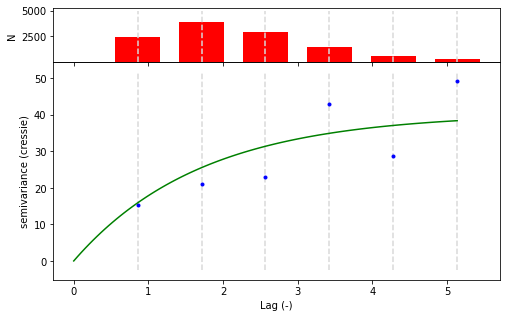

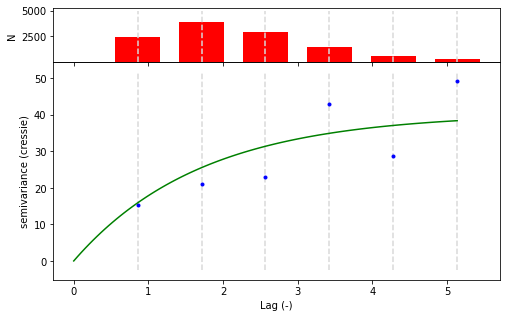

In [47]:
V = skg.Variogram(coordinates=coordinates, 
                  values=values,
                  fit_method='trf',
                  estimator = 'cressie',
                  model='exponential',
                  dist_func='euclidean', 
                  use_nugget=True,
                  n_lags = 6
                 )

# estimator = matheron,cressie,dowd,genton,minmax,entropy 
# model = spherical,exponential,gaussian,cubic,stable,matern,nugget
print(V)

V.plot()

In [48]:
from pykrige.ok import OrdinaryKriging

okm = OrdinaryKriging(x=p_train['long'], y=p_train['lati'], z=X_train['resid'], verbose=False,
                      nlags = 6, 
                      variogram_model='exponential',
                      coordinates_type = 'geographic', #euclidean
                      # exact_values = True 
                      #If True, interpolation provides input values at input locations.
                      #If False, interpolation accounts for variance/nugget within input
                      #values at input locations and does not behave as an
                      #exact-interpolator [2].
                     )

In [49]:
pred_reg = lm.predict(X_test)
pred_reg = pred_reg.reshape(-1,1)

In [50]:
krig_val, krig_err = okm.execute('points',xpoints=p_test['long'], ypoints=p_test['lati'])
krig_val = krig_val.reshape(-1,1)
pred_regkrig = pred_reg + krig_val

In [51]:
df = pd.concat([test,pd.DataFrame(pred_regkrig,columns=['pred_regkrig'])],axis=1)

In [52]:
import datetime as dt

df['pred_date'] = np.round(df['pred_regkrig']).apply(lambda x : pd.to_datetime('2010-01-01',format="%Y-%m-%d") + dt.timedelta(days=x))

In [53]:
df

,loca,elv,long,lati,mtemp_8,rain_8,mtemp_9,rain_9,pred_regkrig,pred_date
0,가리산,1050.9,127.956469,37.871378,20.8455,349.9,15.1455,412.1,283.051111,2010-10-11
1,가리왕산,1561.9,128.563367,37.461508,18.1905,331.8,12.4905,385.3,277.091285,2010-10-05
2,가야산,1432.6,128.122942,35.822561,20.4370,309.6,15.3370,230.1,288.224081,2010-10-16
3,가지산,1240.9,129.002939,35.620275,21.5955,114.5,16.4955,182.0,289.821138,2010-10-18
4,감악산,674.9,126.969161,37.939017,21.8255,512.6,16.8255,432.5,288.186022,2010-10-16
...,...,...,...,...,...,...,...,...,...,...
94,황매산,1113.1,127.974661,35.494294,22.0345,309.6,16.9345,230.1,293.935735,2010-10-22
95,황석산,1192.5,127.755469,35.655175,20.4375,475.8,14.9375,279.8,289.040204,2010-10-17
96,황악산,1111.4,127.966822,36.118075,22.1430,418.3,16.3430,188.6,291.400786,2010-10-19
97,황장산,1078.9,128.276197,36.814977,20.0055,424.8,14.1055,175.1,286.700258,2010-10-15
